In [80]:
%matplotlib inline
import config
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
conn = psycopg2.connect(
    host=config.HOST,
    database=config.DATABASE,
    user=config.USER,
    password=config.PASSWORD,
    port=config.PORT)

In [107]:
cur = conn.cursor()

print('PostgreSQL database version:')
cur.execute('SELECT version()')

PostgreSQL database version:


In [108]:
db_version = cur.fetchone()
print(db_version)

('PostgreSQL 12.5 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.3 20140911 (Red Hat 4.8.3-9), 64-bit',)


In [109]:
sqlQuery = 'SELECT d.ranking, d.score, d.gdppercapita, d.socialsupport, d.healthylifeexpectancy, d.freedom, d.generosity, d.perceptionofcorruption, cpi.cpi_score, cpi.rank FROM data_2019 as d INNER JOIN "countryCPI" as cpi ON d.countryorregion = cpi.country WHERE cpi.year = 2019'

In [110]:
cur.execute(sqlQuery)

In [111]:
data = cur.fetchall()

In [112]:
framedData = pd.DataFrame(np.array(data))

In [113]:
conn.close()

In [115]:
print(framedData)

         0      1      2      3      4      5      6      7     8      9
0      2.0  7.600  1.383  1.573  0.996  0.592  0.252  0.410  87.0    1.0
1      8.0  7.307  1.303  1.557  1.026  0.585  0.330  0.380  87.0    1.0
2      1.0  7.769  1.340  1.587  0.986  0.596  0.153  0.393  86.0    3.0
3     34.0  6.262  1.572  1.463  1.141  0.556  0.271  0.453  85.0    4.0
4      7.0  7.343  1.387  1.487  1.009  0.574  0.267  0.373  85.0    4.0
..     ...    ...    ...    ...    ...    ...    ...    ...   ...    ...
142  108.0  4.707  0.960  1.427  0.805  0.154  0.064  0.047  16.0  173.0
143  151.0  3.380  0.287  1.163  0.463  0.143  0.108  0.077  15.0  177.0
144  149.0  3.462  0.619  0.378  0.440  0.013  0.331  0.141  13.0  178.0
145  112.0  4.668  0.000  0.698  0.268  0.559  0.243  0.270   9.0  180.0
146  156.0  2.853  0.306  0.575  0.295  0.010  0.202  0.091  12.0  179.0

[147 rows x 10 columns]


In [116]:
framedData.columns = ['Happiness Ranking', 'Happiness Score', "GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom", "Generosity", 'Corruption Perception Score', 'CPI Score', 'CPI Ranking']

In [117]:
framedData.head().T

,0,1,2,3,4
Happiness Ranking,2.000,8.000,1.000,34.000,7.000
Happiness Score,7.600,7.307,7.769,6.262,7.343
GDP per Capita,1.383,1.303,1.340,1.572,1.387
Social Support,1.573,1.557,1.587,1.463,1.487
Healthy Life Expectancy,0.996,1.026,0.986,1.141,1.009
Freedom,0.592,0.585,0.596,0.556,0.574
Generosity,0.252,0.330,0.153,0.271,0.267
Corruption Perception Score,0.410,0.380,0.393,0.453,0.373
CPI Score,87.000,87.000,86.000,85.000,85.000
CPI Ranking,1.000,1.000,3.000,4.000,4.000


In [118]:
framedData.dtypes

Happiness Ranking              float64
Happiness Score                float64
GDP per Capita                 float64
Social Support                 float64
Healthy Life Expectancy        float64
Freedom                        float64
Generosity                     float64
Corruption Perception Score    float64
CPI Score                      float64
CPI Ranking                    float64
dtype: object

In [121]:
framedData = framedData.astype(np.float32)

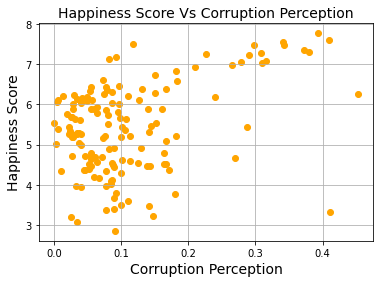

In [122]:
plt.scatter(framedData['Corruption Perception Score'], framedData['Happiness Score'], color='orange')
plt.title('Happiness Score Vs Corruption Perception', fontsize=14)
plt.xlabel('Corruption Perception', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(True)

plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=6)

plt.show()

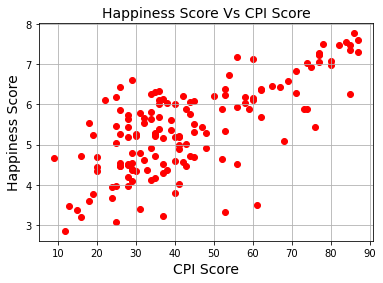

In [123]:
plt.scatter(framedData['CPI Score'], framedData['Happiness Score'], color='red')
plt.title('Happiness Score Vs CPI Score', fontsize=14)
plt.xlabel('CPI Score', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(True)
plt.show()

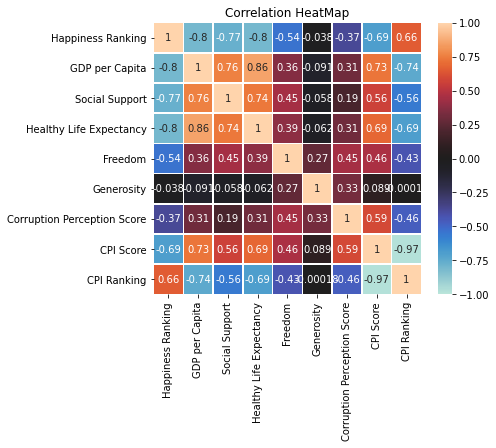

In [126]:
#list of column names to keep
col_names = framedData.columns

df = framedData[col_names]

#filtering the dataframe to include just the IV's (features) and another with just the DV's (target)

features = df.loc[:,df.columns != 'Happiness Score']
targets = df.loc[:,df.columns == 'Happiness Score']

#creating pairwise correlation of columns using Pearson's R,
corr = features.corr(method='pearson') 

#plotting the correlation coefficients on a seasborn heatmap matrix
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)

plt.title('Correlation HeatMap')
plt.show()

In [127]:
X = framedData.drop(columns=['CPI Score', 'CPI Ranking'], axis=1)
y = framedData["CPI Score"]
print(X.shape, y.shape)

(147, 8) (147,)


In [128]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [129]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_train, y_train)
print(f"R2 Score: {score}")

R2 Score: 0.7182221643600344


In [130]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [131]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training R2 Score: {training_score}")
print(f"Testing R2 Score: {testing_score}")

Training R2 Score: 0.7182221643600344
Testing R2 Score: 0.6011205456278965


Text(0.5, 1.0, 'Residual Plot')

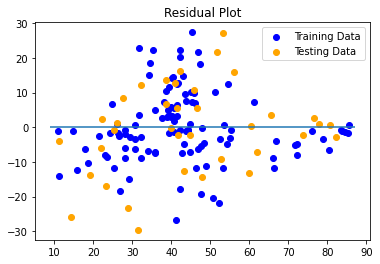

In [132]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [133]:
print(y)

0      87.0
1      87.0
2      86.0
3      85.0
4      85.0
       ... 
142    16.0
143    15.0
144    13.0
145     9.0
146    12.0
Name: CPI Score, Length: 147, dtype: float32


In [134]:
print(X_train)

     Happiness Ranking  Happiness Score  GDP per Capita  Social Support  \
145              112.0            4.668           0.000           0.698   
42                57.0            5.888           1.120           1.402   
16                55.0            5.893           1.237           1.528   
10                11.0            7.228           1.372           1.548   
115              141.0            3.975           0.073           0.922   
..                 ...              ...             ...             ...   
71                43.0            6.125           0.985           1.410   
106              104.0            4.799           1.057           1.183   
14                10.0            7.246           1.376           1.475   
92                71.0            5.529           0.685           1.328   
102               86.0            5.261           0.551           1.438   

     Healthy Life Expectancy  Freedom  Generosity  Corruption Perception Score  
145               

In [135]:
print(y_train)

145     9.0
42     52.0
16     74.0
10     77.0
115    28.0
       ... 
71     37.0
106    31.0
14     77.0
92     32.0
102    30.0
Name: CPI Score, Length: 110, dtype: float32


In [136]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [146]:
# fit a logistic regression on the training dataset
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# create the inputs and outputs
# X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=2)

# print(X_train, y_train)

# y=y.astype(np.int)

# define model
model = GradientBoostingRegressor(learning_rate=0.02, n_estimators=10_000)
# fit model
model.fit(X_train, y_train)

yhat = model.score(X_test, y_test)

yPredict = model.predict(X_test)

# evaluate predictions
#acc = accuracy_score(y, yhat)
#print(acc)

print(yhat)

regression_results(y_test, yPredict)

0.7269022263662934
explained_variance:  0.7351
mean_squared_log_error:  0.0782
r2:  0.7269
MAE:  7.9368
MSE:  108.1762
RMSE:  10.4008


In [40]:
??BayesianRidge